<a href="https://colab.research.google.com/github/beingshivam/Data_Analysis/blob/master/DA_Model_development_Scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# path of data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
print(len(df))
df.head()


201


,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [0]:
#module for linear regression

from sklearn.linear_model import LinearRegression

In [5]:
#create linear regression object

lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#predicting price using 'highway-mpg'

X = df[['highway-mpg']] #independent variable/predictor variable
Y = df[['price']] #dependent variable



In [7]:
#fit the linear model using 'highway-mpg'

lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
#output the prediction

Yhat = lm.predict(X)
print(len(Yhat))

201


In [0]:
#value of intercept (a)

lm.intercept_

array([38423.30585816])

In [0]:
#value of slope (b)

lm.coef_

array([[-821.73337832]])

In [0]:
#equation of the predicted line

'''
Yhat = 38423.30585816 + (-821.73337832)*X

ie.

price= 38423.30585816 + (-821.73337832)*highway-mpg
'''

'\nYhat = 38423.30585816 + (-821.73337832)*X\n\nie.\n\nprice= 38423.30585816 + (-821.73337832)*highway-mpg\n'

In [0]:
#Multiple regression

'''
Yhat = a + b1X1+b2X2+b3X3

'''


'\nYhat = a + b1X1+b2X2+b3X3\n\n'

In [0]:
#lets create a model using different predictors-> Horsepower, Curb-weight ,Engine-size, Highway-mpg

Z = df[['horsepower', 'curb-weight' ,'engine-size', 'highway-mpg']] #independent variable (multiple)

In [0]:
lm.fit(Z,df[['price']]) #dependent variable is price

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#value of intercept (a)
lm.intercept_

array([-15806.62462633])

In [0]:
#value of slope/coefficient (b)

lm.coef_

array([[53.49574423,  4.70770099, 81.53026382, 36.05748882]])

In [0]:
#equation->

'''
Yhat = -15806.62462633 + 53.49574423*X1 + 4.70770099*X2 + 81.53026382*X3 + 36.05748882*X4
'''

'\nYhat = -15806.62462633 + 53.49574423*X1 + 4.70770099*X2 + 81.53026382*X3 + 36.05748882*X4\n'

In [0]:
#Model evaluation using vizualization -> choosing the best model

import seaborn as sns
%matplotlib inline

(0, 48265.11675895208)

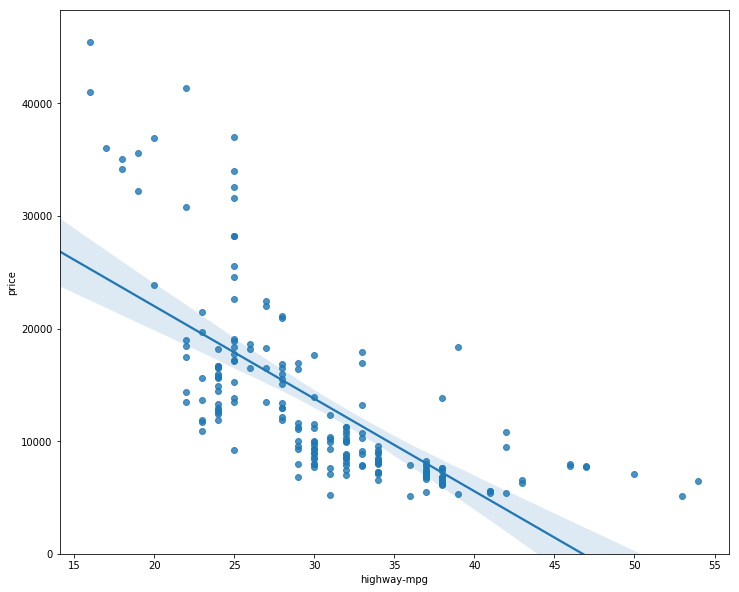

In [0]:
#regression plot

#regression plot of highway-mpg vs price

width = 12
height = 10
plt.figure(figsize=(width,height))
sns.regplot(x='highway-mpg',y='price',data=df)
plt.ylim(0,)

(0, 47422.919330307624)

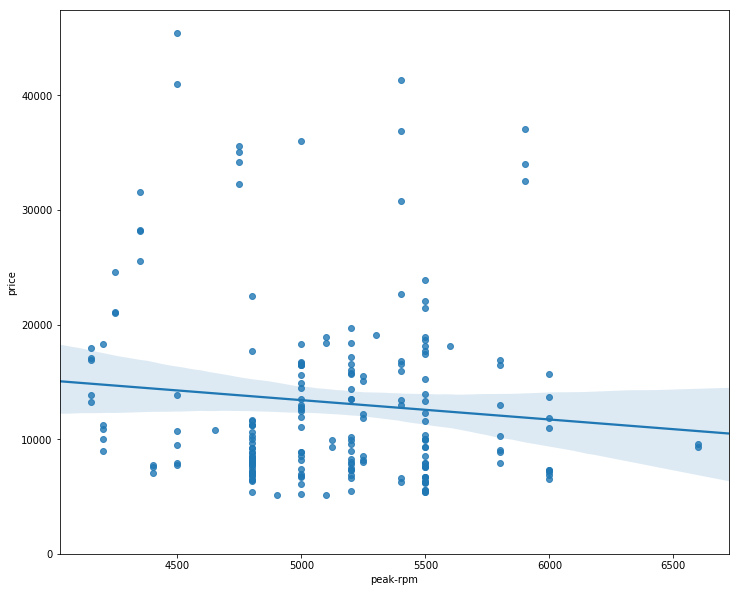

In [0]:
#regression plot of 'peak-rpm' vs 'price'

width = 12
height = 10
plt.figure(figsize=(width,height))
sns.regplot(x='peak-rpm',y='price',data=df)
plt.ylim(0,)

In [0]:
#which regression plot is more strongly correlated with price?

df[['peak-rpm','highway-mpg','price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


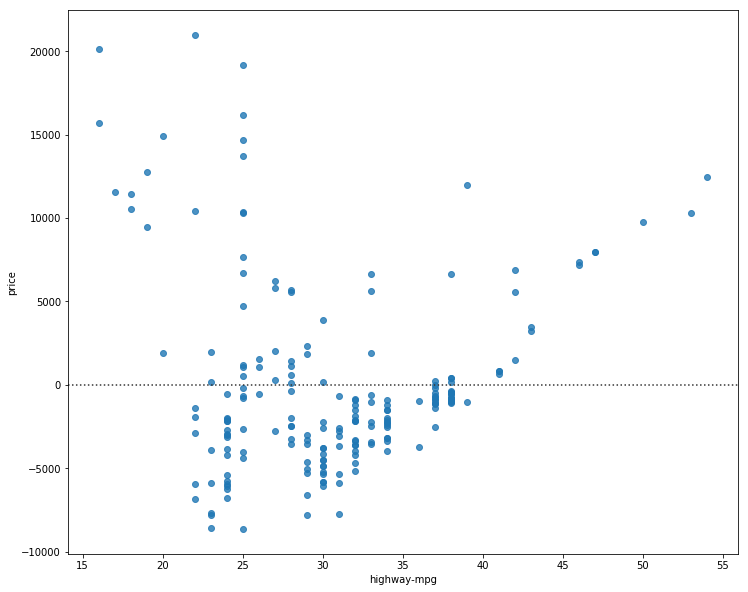

In [0]:
#Residual plot -> visualize variance of a data

width =12
height =10
plt.figure(figsize=(width,height))
sns.residplot(df['highway-mpg'],df['price'])
plt.show()

In [0]:
#visualize a model for multiple linear regression

#predict

Yhat=lm.predict(Z)

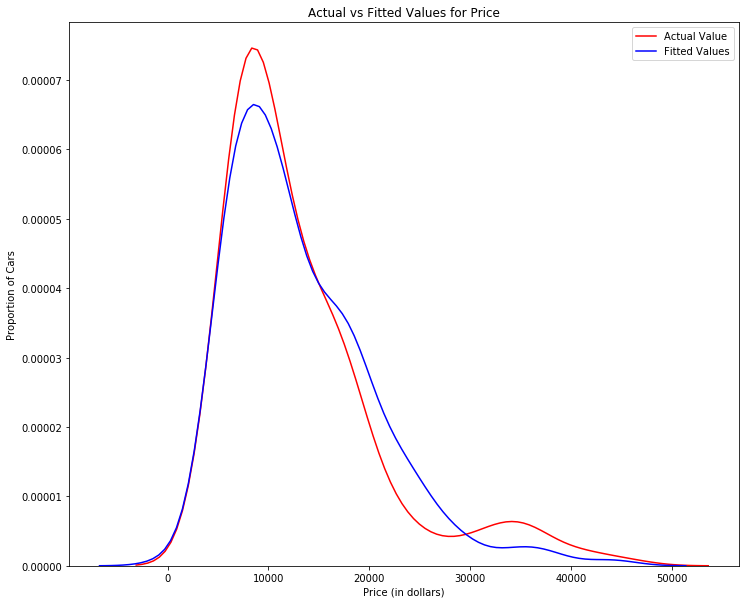

In [0]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [0]:
#polynomial regression and pipelines

def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [0]:
x = df['highway-mpg']
y = df['price']

In [0]:
# fit the polynomial using the function polyfit, then use the function poly1d to display the polynomial function.

# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


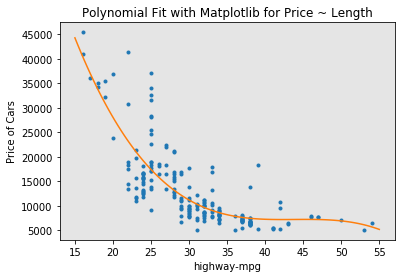

In [0]:
#plot the function

PlotPolly(p, x, y, 'highway-mpg')

In [0]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])